## Import des libraries

In [144]:
from pandas import DataFrame
from pandas import read_csv
from pandas import crosstab
import bigml.api
from bigml.api import BigML
import kaggle
import matplotlib


## Modification des features de cs-train

In [ ]:
df = read_csv('cs-training.csv', header=0, index_col=0)
df.fillna(0, inplace=True)
df['NumberOfTimeTotalDelay'] = df['NumberOfTime30-59DaysPastDueNotWorse']
                                + df['NumberOfTimes90DaysLate']
                                + df['NumberOfTime60-89DaysPastDueNotWorse']
df['isOld'] =df['age']>70
df.to_csv('train_full.csv')

## Modification des features de cs_test

In [ ]:
df = read_csv('cs-test.csv', header=0, index_col=0)
df.fillna(0, inplace=True)
df['NumberOfTimeTotalDelay'] = df['NumberOfTime30-59DaysPastDueNotWorse']
                                + df['NumberOfTimes90DaysLate']
                                + df['NumberOfTime60-89DaysPastDueNotWorse']
df['isOld'] =df['age']>70
df.to_csv('test_full.csv')

## Identification du projet sur BigML

In [8]:
api = BigML(project='project/5d94a344eba31d460c000235')

## Création des datasets avec les cs-train et cs-test modifiés

In [ ]:
source_train = api.create_source('train_full.csv')
origin_dataset = api.create_dataset(source_train)
source_test = api.create_source('test_full.csv')
test_dataset = api.create_dataset(source_test)

## Split du train dataset

In [ ]:
train_dataset = api.create_dataset(
    origin_dataset, {"name": "Training_split_Jupyter",
                     "sample_rate": 0.8, "seed": "my seed"})
val_dataset = api.create_dataset(
    origin_dataset, {"name": "Validation_split_Jupyter",
                     "sample_rate": 0.8, "seed": "my seed",
                     "out_of_bag": True})

## Création du modèle avec le split de train dataset

In [ ]:
ensemble = api.create_ensemble(train_dataset,{"name": "ensemble_Jupyter",
     "objective_field": "SeriousDlqin2yrs"})

## Evaluation du modèle avec val dataset

In [ ]:
evaluation = api.create_evaluation(ensemble, val_dataset)

## Création du Batch Prediction, avec le test set modifié

In [ ]:
batch_prediction = api.create_batch_prediction(ensemble, test_dataset, {
    "name": "ensemble_prediction_Jupyter", "all_fields": True,
    "header": True,
    "confidence": True,
    "probabilities": True})
api.ok(batch_prediction)

## Export du batch prediction en csv

In [ ]:
api.download_batch_prediction(batch_prediction,
    filename='ensemble_prediction_Jupyter.csv')

## Modification du fichier csv à envoyer à Kaggle

In [ ]:
df = read_csv('ensemble_prediction_Jupyter.csv', header=0, index_col=0)
df2 =df [['1 probability']]
df2.index.names = ['Id']
df2.rename(columns={"1 probability": "Probability"},inplace=True)

In [ ]:
df2.to_csv('prediction_kaggle.csv')

## Soumission à Kaggle

In [ ]:
submission_file = "prediction_kaggle.csv"
kaggle.api.competition_submit(submission_file, "BigML ensemble", "GiveMeSomeCredit")

## Afficher l'évaluation du modèle

In [6]:
evaluation = api.get_evaluation('evaluation/5dacd5997811dd0137000513')
api.pprint(evaluation['object']['result'])

{   'class_names': ['0', '1'],
    'mode': {   'accuracy': 0.93283,
                'average_area_under_pr_curve': 0,
                'average_area_under_roc_curve': 0,
                'average_balanced_accuracy': 0.5,
                'average_f_measure': 0.48262,
                'average_kendalls_tau_b': 0,
                'average_ks_statistic': 0,
                'average_max_phi': 0,
                'average_phi': 0,
                'average_precision': 0.46642,
                'average_recall': 0.5,
                'average_spearmans_rho': 0,
                'confusion_matrix': [[27985, 0], [2015, 0]],
                'per_class_statistics': [   {   'accuracy': 0.93283,
                                                'balanced_accuracy': 0.5,
                                                'class_name': '0',
                                                'f_measure': 0.96525,
                                                'phi_coefficient': 0,
                                   

                                                 'ks_statistic': [   0.55238,
                                                                     0.93469],
                                                 'lift_curve': [   [0, 0, 1],
                                                                   [   0.01217,
                                                                       1.06319,
                                                                       0.99709],
                                                                   [   0.04313,
                                                                       1.0662,
                                                                       0.99624],
                                                                   [   0.05903,
                                                                       1.06656,
                                                                       0.99589],
                                           

                                                                         0.92524],
                                                                     [   0.77623,
                                                                         0.26104,
                                                                         0.92379],
                                                                     [   0.7855,
                                                                         0.27345,
                                                                         0.92],
                                                                     [   0.7871,
                                                                         0.27494,
                                                                         0.91954],
                                                                     [   0.79633,
                                                                         0.28536,
                 

                                                                                             0.91954],
                                                                                         [   [   23014,
                                                                                                 551,
                                                                                                 1464,
                                                                                                 4971],
                                                                                             0.92],
                                                                                         [   [   22761,
                                                                                                 526,
                                                                                                 1489,
                                                                           

                                                                     0.98591,
                                                                     0.96609],
                                                                 [   0.64052,
                                                                     0.98576,
                                                                     0.96532],
                                                                 [   0.64406,
                                                                     0.98573,
                                                                     0.96477],
                                                                 [   0.65389,
                                                                     0.98557,
                                                                     0.96316],
                                                                 [   0.65971,
                                                            

                                             {   'accuracy': 0.9363,
                                                 'area_under_pr_curve': 0.37701,
                                                 'area_under_roc_curve': 0.85363,
                                                 'balanced_accuracy': 0.58314,
                                                 'class_name': '1',
                                                 'f_measure': 0.26977,
                                                 'gain_curve': [   [0, 0, 1],
                                                                   [   0.0004,
                                                                       0.00397,
                                                                       0.7],
                                                                   [   0.00133,
                                                                       0.01439,
                                                                       0.69]

                                                                   [   0.35377,
                                                                       0.84963,
                                                                       0.04145],
                                                                   [   0.36237,
                                                                       0.85806,
                                                                       0.04],
                                                                   [   0.36383,
                                                                       0.85906,
                                                                       0.03967],
                                                                   [   0.38763,
                                                                       0.86998,
                                                                       0.03572],
                                       

                                                                         0.24043],
                                                                     [   0.0782,
                                                                         0.05013,
                                                                         0.24],
                                                                     [   0.0819,
                                                                         0.05324,
                                                                         0.23],
                                                                     [   0.0824,
                                                                         0.05371,
                                                                         0.22821],
                                                                     [   0.08387,
                                                                         0.05485,
                     

                                                                                                 134,
                                                                                                 27851,
                                                                                                 1798],
                                                                                             0.58253],
                                                                                         [   [   209,
                                                                                                 127,
                                                                                                 27858,
                                                                                                 1806],
                                                                                             0.59],
                                                                           

                                                                  [   0.04652,
                                                                      0.45211,
                                                                      0.25867],
                                                                  [   0.04831,
                                                                      0.45806,
                                                                      0.25],
                                                                  [   0.05003,
                                                                      0.4665,
                                                                      0.24043],
                                                                  [   0.05013,
                                                                      0.46799,
                                                                      0.24],
                                                       

## Récupérer l'accuracy de l'évaluation

In [ ]:
api.pprint(evaluation['object']['result']['model']['accuracy'])

## Batch Prediction sur val dataset pour estimer les erreurs

In [ ]:
batch_prediction = api.create_batch_prediction('ensemble/5dacd57a7811dd7f2d003bf8', 'dataset/5dacd5617811dd7f2d003bf5', {
    "name": "ensemble_prediction_sur_validation", "all_fields": True,
    "header": True,
    "confidence": True,
    "probabilities": True})
api.ok(batch_prediction)

In [ ]:
api.download_batch_prediction('batchprediction/5db1c37ee47684746800980b',
    filename='ensemble_prediction_valset.csv')

In [ ]:
df = read_csv('ensemble_prediction_valset.csv', header=0, index_col=0)
df

In [ ]:
df.rename(columns={"SeriousDlqin2yrs.1" : "SeriousDlqin2yrs_predict"},inplace=True)
df

## Création fonction Matrice Confusion (sans seuil)

In [ ]:
def confusion(row):
    if (row['SeriousDlqin2yrs'] == 0 and row['SeriousDlqin2yrs_predict'] == 0):
        confusion_value = 'TN'
    if (row['SeriousDlqin2yrs'] == 0 and row['SeriousDlqin2yrs_predict'] == 1):
        confusion_value = 'FP'
    if (row['SeriousDlqin2yrs'] == 1 and row['SeriousDlqin2yrs_predict'] == 0):
        confusion_value = 'FN'
    if (row['SeriousDlqin2yrs'] == 1 and row['SeriousDlqin2yrs_predict'] == 1):
        confusion_value = 'TP'
    return confusion_value

df['confusion'] = df.apply(confusion, axis = 1)
df.to_csv('confusion_matrix.csv', index=False)

## Création fonction Matrice Confusion (avec seuil)

In [ ]:
def seuil(row):    
    seuil_value = 0.5
    if (row['1 probability'] < seuil_value):
        seuil_value = 0
    else:
        seuil_value = 1
    return seuil_value

def confusion_seuil(row):
    if (row['SeriousDlqin2yrs'] == 0 and row['my_predict'] == 0):
        confusion_value = 'TN'
    if (row['SeriousDlqin2yrs'] == 0 and row['my_predict'] == 1):
        confusion_value = 'FP'
    if (row['SeriousDlqin2yrs'] == 1 and row['my_predict'] == 0):
        confusion_value = 'FN'
    if (row['SeriousDlqin2yrs'] == 1 and row['my_predict'] == 1):
        confusion_value = 'TP'
    return confusion_value

df['my_predict'] = df.apply(seuil, axis = 1)
df['confusion'] = df.apply(confusion_seuil, axis = 1)
df.to_csv('confusion_matrix_avec seuil.csv', index=False)

In [ ]:
df = read_csv('confusion_matrix.csv', header=0, index_col=False)

## Compte le nombre d'erreurs (sans seuil)

In [ ]:
nb_erreur = list(df.confusion.values)
TP = nb_erreur.count("TP")
TN = nb_erreur.count("TN")
FP = nb_erreur.count("FP")
FN = nb_erreur.count("FN")

print(f"TP = {TP} \nTN = {TN} \nFP = {FP} \nFN = {FN}")


## Compte le nombre d'erreurs (avec seuil)

In [ ]:
df = read_csv('confusion_matrix_avec seuil.csv', header=0, index_col=False)
nb_erreur = list(df.confusion.values)
TP = nb_erreur.count("TP")
TN = nb_erreur.count("TN")
FP = nb_erreur.count("FP")
FN = nb_erreur.count("FN")

print(f"TP = {TP} \nTN = {TN} \nFP = {FP} \nFN = {FN}")

## Calcul du gain total

In [ ]:
#Actual / Predicted    0    1
#0    $500    -$500
#1    -$2500    $0

#Actual / Predicted 0 / 1
#0    TN    FP
#1    FN    TP

gain_total = TN * 500 + FP * -500 + FN * -2500 + TP * 0
print(f"Le gain total est: {gain_total}")

## Optimisation du seuil pour maximaliser le gain total

In [ ]:
def seuil_optimisation(row):
    seuil_value = seuil
    if (row['1 probability'] < seuil_value):
        seuil_value = 0
    else:
        seuil_value = 1
    return seuil_value

seuil = 0.5
df['my_predict'] = df.apply(seuil_optimisation, axis = 1)
df['confusion'] = df.apply(confusion, axis = 1)


In [ ]:
def confusion_seuil(row):
    if (row['SeriousDlqin2yrs'] == 0 and row['my_predict'] == 0):
        confusion_value = 'TN'
    if (row['SeriousDlqin2yrs'] == 0 and row['my_predict'] == 1):
        confusion_value = 'FP'
    if (row['SeriousDlqin2yrs'] == 1 and row['my_predict'] == 0):
        confusion_value = 'FN'
    if (row['SeriousDlqin2yrs'] == 1 and row['my_predict'] == 1):
        confusion_value = 'TP'
    return confusion_value

df = read_csv('ensemble_prediction_valset.csv', header=0, index_col=0)
seuil = 0.5

# initialisation gain_total_max avec seuil 0.5
df['my_predict'] = df.apply(seuil_optimisation, axis = 1)
df['confusion'] = df.apply(confusion_seuil, axis = 1)
nb_erreur = list(df.confusion.values)
TP = nb_erreur.count("TP")
TN = nb_erreur.count("TN")
FP = nb_erreur.count("FP")
FN = nb_erreur.count("FN")
gain_total_max = TN * 500 + FP * -500 + FN * -2500 + TP * 0
gain_total = 0
print(f"Gain total de référence: {gain_total}")
seuil = 0
seuil_pas = 0.01

# bouclage du seuil

while seuil < 1:
    seuil += seuil_pas
    df['my_predict'] = df.apply(seuil_optimisation, axis = 1)
    df['confusion'] = df.apply(confusion_seuil, axis = 1)
    
    nb_erreur = list(df.confusion.values)
    TP = nb_erreur.count("TP")
    TN = nb_erreur.count("TN")
    FP = nb_erreur.count("FP")
    FN = nb_erreur.count("FN")
    gain_total = TN * 500 + FP * -500 + FN * -2500 + TP * 0
    if gain_total > gain_total_max:
        gain_total_max = gain_total
        seuil_max = seuil - seuil_pas
    print(f"Seuil: {round(seuil-seuil_pas, 2)} Gain total: {gain_total}")
seuil -= seuil_pas
print(f"Le gain total max est {gain_total_max} pour un seuil de {round(seuil_max, 2)}")  

## Sauvegarde avec le meilleur seuil

In [ ]:
seuil = seuil_max
df = read_csv('ensemble_prediction_valset.csv', header=0, index_col=0)
df['my_predict'] = df.apply(seuil_optimisation, axis = 1)
df['confusion'] = df.apply(confusion_seuil, axis = 1)
nb_erreur = list(df.confusion.values)
TP = nb_erreur.count("TP")
TN = nb_erreur.count("TN")
FP = nb_erreur.count("FP")
FN = nb_erreur.count("FN")
gain_total = TN * 500 + FP * -500 + FN * -2500 + TP * 0
print(f"Le gain total max est {gain_total_max} pour un seuil de {round(seuil_max, 2)}")
df.to_csv('confusion_matrix_avec_meilleur_seuil.csv', index=True)

## Accuracy

In [ ]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print(Accuracy)

## 100 premières erreurs

In [ ]:
df = read_csv('confusion_matrix_avec_meilleur_seuil.csv', header=0, index_col=False)
df.rename(columns={"field1" : "Id"},inplace=True)
df.to_csv('confusion_matrix_avec_meilleur_seuil.csv', index=True)

In [ ]:
df['error_abs'] = abs(seuil_max - df['1 probability'])
df_2 = df[df['confusion'].isin(["FN","FP"])]
df_2.sort_values(by=['error_abs'], ascending=False, inplace=True)
df_2.head(100)

In [ ]:
df_2.head(100).to_csv('100_grosses_erreurs.csv', index=False)

In [ ]:
df3 = read_csv('100_grosses_erreurs.csv')
df3

## Création et affichage de la courbe du gain en fonction de l'indice (Guillaume)

In [ ]:
def cost_threshold(threshold):
    prediction_threshold = prediction['1 probability'] > threshold

    #~ = "not" pour les tableaux / & = "and" pour les tableaux / | = "or" pour les tableaux

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (prediction['SeriousDlqin2yrs'] == 1)
    N_real = (prediction['SeriousDlqin2yrs'] == 0)

    TP = len(prediction.loc[P_pred & P_real])
    TN = len(prediction.loc[N_pred & N_real])
    FP = len(prediction.loc[P_pred & N_real])
    FN = len(prediction.loc[N_pred & P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost

import matplotlib.pyplot as plt
%matplotlib inline
table = [cost_threshold(n/1000) for n in range(0,1000)]
plt.plot(table)


Test méthode Guillaume pour la courbe d'opitmisation du seuil

L'indice optimal est de 0.28 pour un gain de $9994500
[-3.74776236e+01  3.44617063e+04  3.01149602e+06]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

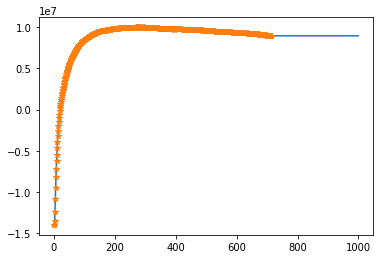

In [108]:
df = read_csv('ensemble_prediction_valset.csv')

def cost_threshold(threshold):
    prediction_threshold = df['1 probability'] > threshold

    #~ = "not" pour les tableaux / & = "and" pour les tableaux / | = "or" pour les tableaux

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (df['SeriousDlqin2yrs'] == 1)
    N_real = (df['SeriousDlqin2yrs'] == 0)

    TP = len(df.loc[P_pred & P_real])
    TN = len(df.loc[N_pred & N_real])
    FP = len(df.loc[P_pred & N_real])
    FN = len(df.loc[N_pred & P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost

import matplotlib.pyplot as plt
%matplotlib inline
table = [cost_threshold(n/1000) for n in range(0,1000)]
plt.plot(table)

# cherche le maximum de la courbe
max_gain = max(table)
max_threshold = table.index(max_gain)/1000
print(f"L'indice optimal est de {max_threshold} pour un gain de ${max_gain}")

#from scipy import polyfit
import numpy
import warnings
x = []
y = []
for xi in range(0, len(table)):
    y.append(table[xi])
    x.append(table.index(table[xi]))
   
coeff = polyfit(x, y, 2)
print(coeff)

plt.plot(x,y,"*")
plt.plot(x,coeff[0]*x**2+coeff[1]*x+coeff[2])
plt.show()

## Compte Erreurs (Bastien)

In [37]:
df = read_csv('confusion_matrix.csv', header=0, index_col=False)
matrix =df.groupby(['confusion']).confusion.count()  # le deuxième Error est la répétition du nom de la colonne Error
print(matrix)
# df_matrix = DataFrame(data={'Predicted_1':[matrix.TP, matrix.FP], 'Predicted_0':[matrix.TN, matrix.FN]})
# df_matrix

confusion
FN     1662
FP      249
TN    27736
TP      353
Name: confusion, dtype: int64


,Predicted_1,Predicted_0
0,353,27736
1,249,1662


## Matrice de confusion (Laurent)

In [ ]:
df = read_csv('confusion_matrix.csv', header=0, index_col=False)
df
confusion_matrix = df['confusion'].value_counts()
print(confusion_matrix)

# calcul de l'AUC 

In [62]:
# grouper tous les positifs
# comparer chaque positif à tous les négatifs
# compter le nombre de fois où le 1_proba d'un positif est supérieur au 1_proba d'un négatif
# faire le ratio sur le nombre total de ocmbianaisons

df = read_csv('confusion_matrix.csv', header=0, index_col=False)
df
df_positives = df.loc[df['SeriousDlqin2yrs_predict'] == 1]
df_negatives = df.loc[df['SeriousDlqin2yrs_predict'] == 0]

In [71]:
df_positives.iloc[1]

SeriousDlqin2yrs                               1
RevolvingUtilizationOfUnsecuredLines    0.954449
age                                           55
NumberOfTime30-59DaysPastDueNotWorse           5
DebtRatio                                    773
MonthlyIncome                                  0
NumberOfOpenCreditLinesAndLoans                7
NumberOfTimes90DaysLate                        1
NumberRealEstateLoansOrLines                   0
NumberOfTime60-89DaysPastDueNotWorse           3
NumberOfDependents                             0
NumberOfTimeTotalDelay                         9
isOld                                      False
SeriousDlqin2yrs_predict                       1
confidence                               0.58065
0 probability                            0.37462
1 probability                            0.62538
confusion                                     TP
Name: 210, dtype: object

In [ ]:
for row_pos in range(len(df_positives)):
    for row_neg in range(len(df_negatives)):
        if df_positives.iloc['1 probability'][row_pos] > df_negatives.iloc['0 probability'][row_neg]:
            count_pos += 1
        
df_positives
df_negatives

## AUC Laurent

In [84]:
df = read_csv('ensemble_prediction_valset.csv', header =0, index_col = False)
df

,field1,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfTimeTotalDelay,isOld,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
0,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,1,False,0,0.63347,0.71711,0.28289
1,20,0,0.602794,25,0,0.065868,333,2,0,0,0,0,0,False,0,0.89982,0.93188,0.06812
2,27,0,0.052436,58,0,0.097672,8333,22,0,1,0,0,0,False,0,0.97585,0.98274,0.01726
3,28,0,0.034421,69,0,0.042383,2500,17,0,0,0,1,0,False,0,0.98845,0.99358,0.00642
4,31,0,0.704074,28,1,0.155201,4200,8,0,0,0,0,1,False,0,0.83956,0.86391,0.13609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0,0.230353,61,0,883.000000,0,15,0,0,0,2,0,False,0,0.98347,0.99006,0.00994
29996,149972,0,0.058001,83,0,0.013997,5000,6,0,0,0,0,0,True,0,0.99530,0.99724,0.00276
29997,149976,0,0.022088,58,0,2716.000000,0,8,0,2,0,0,0,False,0,0.98713,0.99244,0.00757
29998,149986,0,0.954409,26,0,0.324962,1950,4,0,0,0,0,0,False,0,0.88097,0.90691,0.09309


In [91]:
# Tri des données pour préparer le calcul de AUC
df_sorted = df.sort_values('1 probability', ascending=False)

#  Calcul de la somme des négatifs en dessous de chaque positifs (1 probability est inférieur)

N_sum_below = 0
for index in range(len(df_sorted)):
    if df_sorted['SeriousDlqin2yrs'].iloc[index] == 1:
        N_sum_below += df_sorted['SeriousDlqin2yrs'][index+1:].value_counts().loc[0]

# Calcul du produit nombre N * nombre P
N_number = df_sorted['SeriousDlqin2yrs'].value_counts().loc[0]
P_number  = df_sorted['SeriousDlqin2yrs'].value_counts().loc[1]
NP_product = N_number * P_number

# Calcul auc
AUC = N_sum_below / NP_product
AUC


0.8534131054787858

## AUC Maud

In [112]:
df = read_csv('ensemble_prediction_valset.csv', header =0, index_col = False)
df

,field1,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfTimeTotalDelay,isOld,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
0,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,1,False,0,0.63347,0.71711,0.28289
1,20,0,0.602794,25,0,0.065868,333,2,0,0,0,0,0,False,0,0.89982,0.93188,0.06812
2,27,0,0.052436,58,0,0.097672,8333,22,0,1,0,0,0,False,0,0.97585,0.98274,0.01726
3,28,0,0.034421,69,0,0.042383,2500,17,0,0,0,1,0,False,0,0.98845,0.99358,0.00642
4,31,0,0.704074,28,1,0.155201,4200,8,0,0,0,0,1,False,0,0.83956,0.86391,0.13609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0,0.230353,61,0,883.000000,0,15,0,0,0,2,0,False,0,0.98347,0.99006,0.00994
29996,149972,0,0.058001,83,0,0.013997,5000,6,0,0,0,0,0,True,0,0.99530,0.99724,0.00276
29997,149976,0,0.022088,58,0,2716.000000,0,8,0,2,0,0,0,False,0,0.98713,0.99244,0.00757
29998,149986,0,0.954409,26,0,0.324962,1950,4,0,0,0,0,0,False,0,0.88097,0.90691,0.09309


In [145]:
positive = (df['SeriousDlqin2yrs'] == 1)
nb_positive=len(df.loc[positive])
nb_negative=len(df.loc[~positive])

result = df[['SeriousDlqin2yrs','1 probability']]
threshold_list = result.sort_values(by='1 probability',ascending=False)['SeriousDlqin2yrs'].values

auc = 0
P_cumul = 0

%%timeit
for i in range(len(threshold_list)):
    if threshold_list[i] == 1:
        P_cumul += 1
    else:
        auc += P_cumul
        
auc = auc/(nb_positive*nb_negative)

print(auc)

UsageError: Line magic function `%%timeit` not found.


## AUC Louis

In [ ]:
mask_positives = (val_pred.SeriousDlqin2yrs==1)
mask_negatives = (val_pred.SeriousDlqin2yrs==0)
positives = val_pred[mask_positives]
negatives = val_pred[mask_negatives]

c = 0
n = positives.shape[0] * negatives.shape[0]
for proba_positive in positives['1 Proba']:
    count = negatives[ negatives['1 Proba'] < proba_positive ].shape[0]
    c = c+count

auc = c/n
print(auc)

## AUC Louis (à coder)
### Mesure indépendante du seuil choisi. Traduit la performance du modèle sans tenir compte du gain final. Traduit la capacité du modèle à distinguer les >0 et les <0

In [ ]:
c = 0
pos
neg
for p in pos:
    for n in neg:
        if p['1 proba'] > n['1 proba']:
            c += 1
N = pos.shape * neg.shape
AUC = C / N

## AUC Guillaume

In [ ]:
is_positive = (prediction['SeriousDlqin2yrs'] == 1)
df_threshold=DataFrame(index=prediction['1 probability'])
df_threshold['positive'] = is_positive.values
df_threshold.sort_index(inplace=True, ascending=False)

df_threshold['positive_sum'] =  df_threshold['positive'].cumsum()
auc=df_threshold.loc[~df_threshold['positive']]['positive_sum'].sum()/(nb_positive*nb_negative)

### Summary report

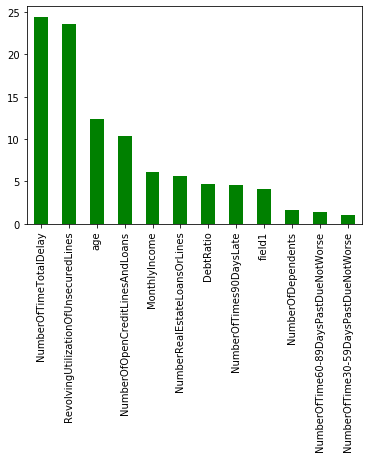

In [82]:
model = api.get_ensemble("ensemble/5dacd57a7811dd7f2d003bf8")
#importances = api.pprint(model['object']['importance'])
importances = model['object']['importance']
#importances['000000']

importances_named = dict()
for column, importance in importances.items():
    column_name = model['object']['ensemble']['fields'][column]['name']
    importances_named[column_name] = [importance * 100]
df = DataFrame.from_dict(importances_named, orient='index')
df
df = df.sort_values(0, ascending=False)
df.plot(kind='bar', color='green', legend=False);
#hist = df.hist()
#hist

In [95]:
model = api.get_ensemble("ensemble/5dacd57a7811dd7f2d003bf8")
#importances = api.pprint(model['object']['importance'])
importances = model['object']['importance']
#importances['000000']

data = importances_named
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(20, 5), sharey=True)
axs.bar(names, values)

xtick_labels = ['Id','RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'MonthlyDebt', 'DisposableIncome', 'BalancedIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'WeightedOfLatePayment', 'NumberOfDependents', 'SeriousDlqin2yrs']
plt.xticks(names, xtick_labels, rotation=30)

fig.suptitle('Importance fields')

NameError: name 'plt' is not defined

In [21]:
importance = api.pprint(model['object'])
importance

{   'boosting': None,
    'category': 0,
    'code': 200,
    'columns': 14,
    'configuration': None,
    'configuration_status': False,
    'created': '2019-10-20T21:45:30.597000',
    'creator': 'madworm33',
    'credits': 30.06513214111328,
    'credits_per_prediction': 0.0,
    'dataset': 'dataset/5dacd5607811dd7f2d003bf2',
    'dataset_field_types': {   'categorical': 2,
                               'datetime': 0,
                               'items': 0,
                               'numeric': 12,
                               'preferred': 14,
                               'text': 0,
                               'total': 14},
    'dataset_status': True,
    'depth_threshold': 512,
    'description': '',
    'distributions': [   {   'importance': [   ['00000c', 0.24133],
                                               ['000002', 0.24038],
                                               ['000003', 0.11501],
                                               ['000007', 0.08169]

                                                                           [   74.79239,
                                                                               2707],
                                                                           [   77.69228,
                                                                               2889],
                                                                           [   80.6549,
                                                                               1501],
                                                                           [   83.30873,
                                                                               1260],
                                                                           [   86.40166,
                                                                               961],
                                                                           [   89.30325,
                                      

                                                                                      'populations': [   95754,
                                                                                                         0,
                                                                                                         13770,
                                                                                                         0,
                                                                                                         4750,
                                                                                                         0,
                                                                                                         2287,
                                                                                                         0,
                                                                                                         1263,
           

## Courbe de performance
tracer courbe AUC = f(nbre data train) : itérer de 0 à 80% du dataset trainfull (0 à 100% du split)

### Bonus
mesurer la performance sur le train set